In [13]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import random
import os

from cell_class import Cells
from class_population import Population
from land_dataset_fitness import CellDiff_Dataset_Landscape
from morphogen_regimes import *
from landscape_visuals import *
from helper_func import plot_cell_proportions, get_cell_data
from landscape_segmentation import Somitogenesis_Landscape  #########
from class_module import Node, UnstableNode, Center, NegCenter

save_dir = 'saved_files_11/'
dir_img = 'images/1/'

seed= 11
np.random.seed(seed)
from decimal import Decimal, getcontext, ROUND_HALF_UP
getcontext().prec = 6
getcontext().rounding = ROUND_HALF_UP

In [14]:
# Cell Initialization
from cell_class import Cells


t0 = 0.
tf = 60.
tc = 52.
div = 40 #40 cells
repl = 20 #20 replicates
#Total num cell = 40*20 = 800
nt = int(tf*3)
noise_init = 0.5
init_cond=(-8, 0)

cell = Cells(t0 = t0, tf = tf, tc = tc , div = div,repl = repl, nt = nt, init_cond = init_cond)
cell.create_Start_Times()
cell.init_position(noise=noise_init)

In [15]:
time_pars = (t0, tf, nt)
morphogen_times = (tc,)

par_limits = {
    'x': (-10.,10.),
    'y': (-5., 5.),
    'a': (0.2,3.),
    's': (0.2, 2)
}

par_choice_values = {
    'tau': (5.,),
    'tilt_lmt': (-0.41, -0.01),
}

landscape_pars = {
    'A0': 0.00005,
    'init_cond': (0., 0.),
    'regime': mr_sigmoid,
    'n_regimes': 2,
    'morphogen_times': morphogen_times,
    'used_fp_types': (Node,),
    'immutable_pars_list': [],
    'tilt': -0.35,
    'tilt_par': (0.5)
}

prob_pars = {
    'prob_tilt': 0.10,
    'prob_add': 0.15,
    'prob_drop': 0.15,
    'prob_shuffle': 0.
    # the rest is mutation of parameters
}

fitness_pars = {
    'ncells': 50,
    'time_pars': time_pars,
    'init_state': (0., 0.),
    't0_shift': 0.5,  # shift (delay) of the time of transition between 2 neighbor cells
    'noise': 0.3,
    'low_value': -1.,
    'high_value': 1.,
    'penalty_weight': 0.1,
    't_stable': 5, # how many timepoints should be at steady state
    'ndt': 50,
    'tilt': (-0.001, -0.4)
}

0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 0.38788684555236563 

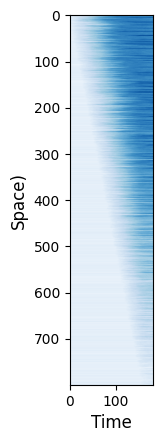

In [16]:
#  Starting with 2 random nodes, then any modules can be added or deleted
start_module_list = [Node.generate(par_limits, par_choice_values, n_regimes=2) for i in range(2)]

# Population size should be even, adjust N to your computing capacity
N = 16
P = Population(cell = cell,N = N, problem_type = Somitogenesis_Landscape, landscape_pars = landscape_pars, prob_pars = prob_pars, fitness_pars = fitness_pars, par_limits = par_limits, par_choice_values = par_choice_values, start_module_list = start_module_list)

plt.imshow(P.landscape_list[0].result, cmap='Blues')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Space)', fontsize=12)

timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
filename = f"{timestamp}-Space_time.png"
file_path = os.path.join(dir_img, filename)
plt.savefig(file_path)
plt.show()
#plt.close()

Tilt:-0.0 in t: 40.0


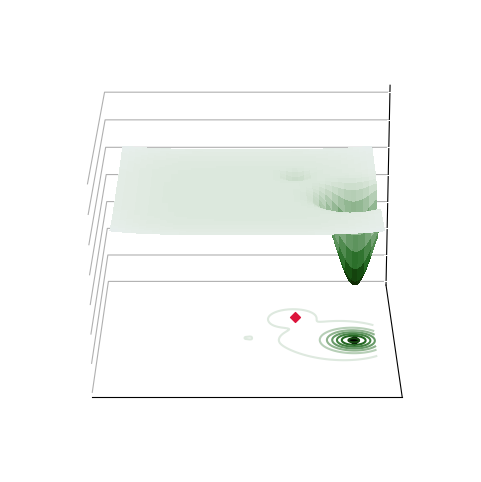

In [17]:
L = 10.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
fig = visualize_potential(P.landscape_list[0], xx, yy, regime=40, color_scheme='order', scatter=True, elev=20, azim=-90)

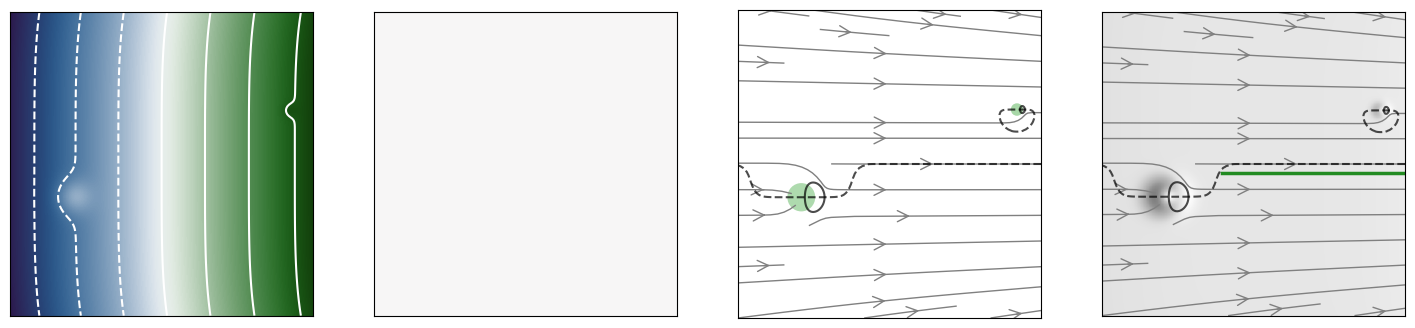

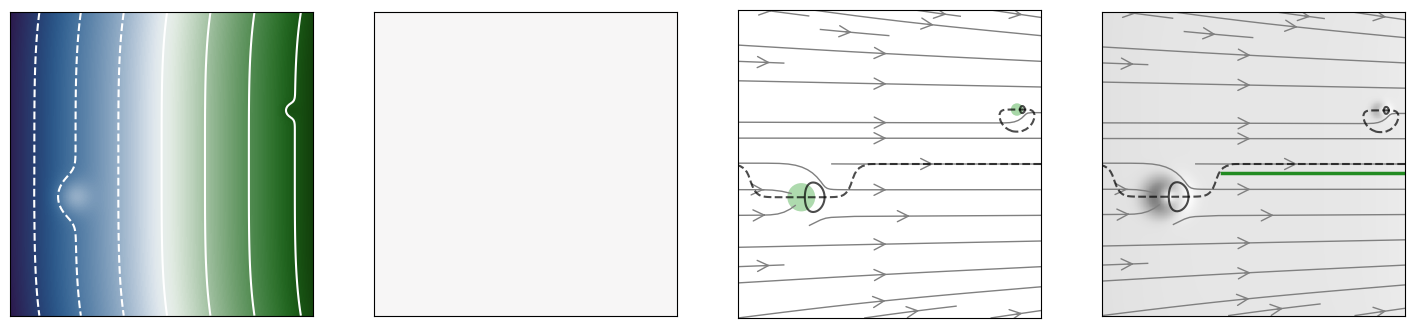

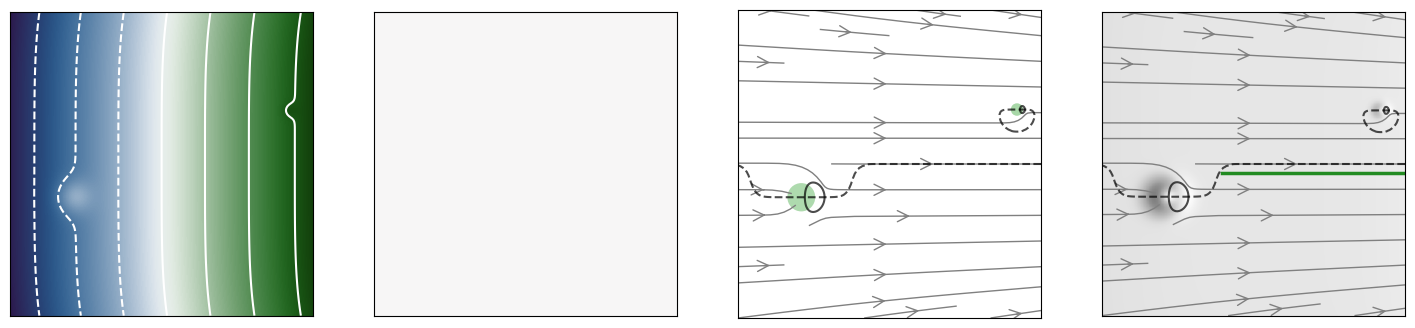

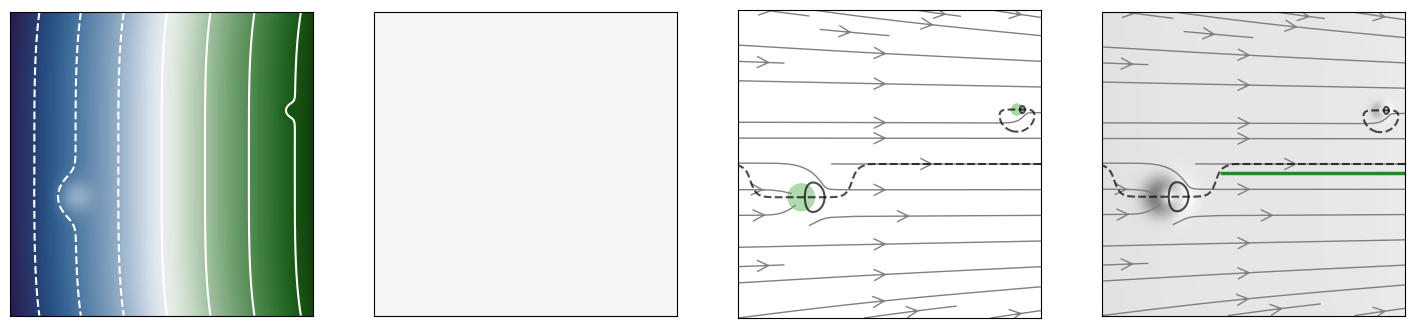

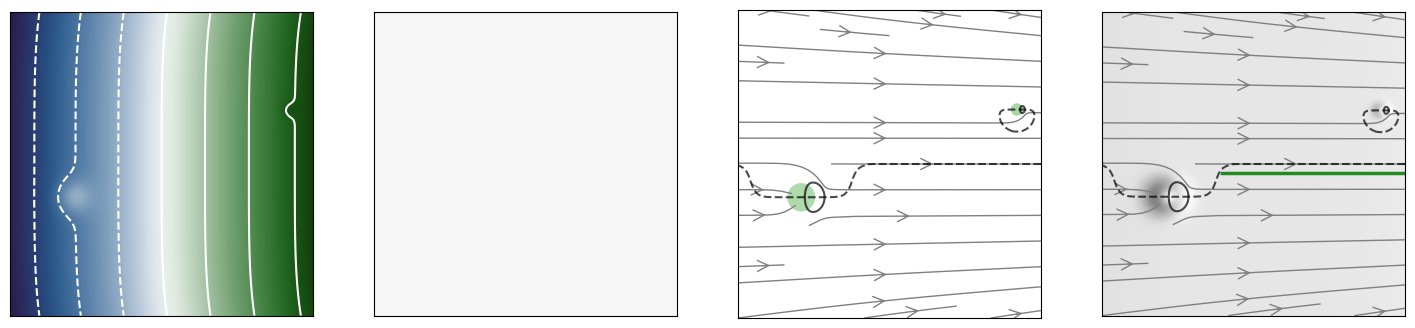

In [5]:
landscape = P.landscape_list[0]

L = 10.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
times = np.array((-5,-2, 0, 2, 5,))
dX, dY = visualize_all(landscape, xx, yy, times, density=0.45, color_scheme='fp_types', plot_traj=True,
                             traj_init_cond=(0., 0.), traj_times=(0., 25., 251))

In [18]:
print(P.landscape_list[0])

Landscape with modules:
Node at (8.33487, -0.48023), a = [2.43699 1.64484], s = [0.3762  1.39532], tau = 5.0,
Node at (3.7813, 4.41439), a = [0.69342 0.47142], s = [1.93215 0.73234], tau = 5.0


Timecode: 20240729-171907
Generation: 0
Generation: 10
Generation: 20
Generation: 30
Generation: 40
Generation: 50
Generation: 60
Generation: 70
Generation: 80
Generation: 90
Generation: 100
Generation: 110
Generation: 120
Generation: 130
Generation: 140
Generation: 150
Generation: 160
Generation: 170
Generation: 180
Generation: 190
Generation: 200
Generation: 210
Generation: 220
Generation: 230
Generation: 240
Best fitness: 1.931541398196994
Done


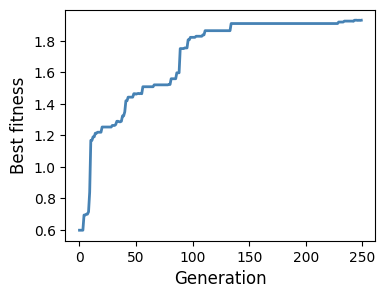

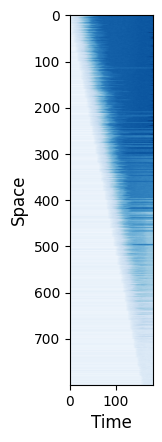

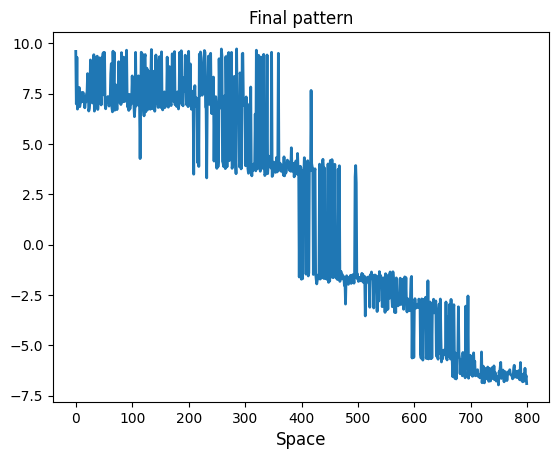

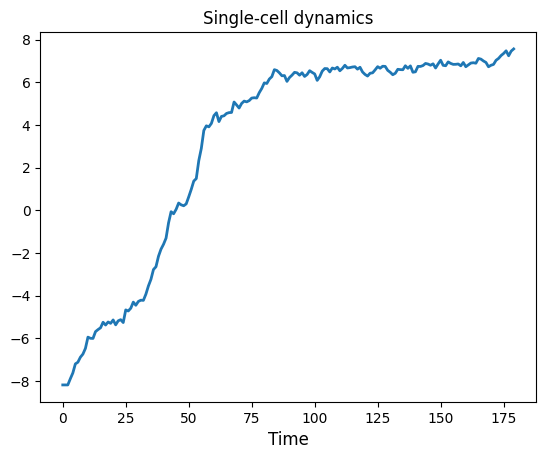

Landscape with modules:
Node at (3.7813, -2.16802), a = [2.10469 0.47142], s = [1.93215 0.56486], tau = 5.0,
Node at (-8.65013, 4.50833), a = [0.95679 1.0298 ], s = [1.37077 0.60744], tau = 5.0,
Node at (-0.2545, -0.83367), a = [1.62925 1.72171], s = [1.54089 0.30534], tau = 5.0,
Node at (-5.95476, -1.39006), a = [0.44355 0.85115], s = [1.99626 0.70559], tau = 5.0,
Node at (-2.64414, -2.46386), a = [1.0074  1.73166], s = [1.41128 1.10349], tau = 5.0,
Node at (-4.80154, 0.99796), a = [1.02182 2.05646], s = [0.23712 1.52839], tau = 5.0,
Node at (-7.16228, -0.34116), a = [0.20565 2.13696], s = [0.6359  1.54655], tau = 5.0,
Node at (-9.28346, 2.6618), a = [1.43521 2.10459], s = [0.44111 1.00112], tau = 5.0,
Node at (8.59467, 2.06814), a = [2.86307 0.6088 ], s = [0.6897  0.38633], tau = 5.0,
Node at (-2.67138, 3.27555), a = [2.82286 1.08619], s = [0.76971 1.37716], tau = 5.0,
Node at (6.8481, -4.00037), a = [2.98686 1.20812], s = [1.51781 0.21556], tau = 5.0,
Node at (9.69516, -0.09785), a 

In [19]:
fitness_traj = P.evolve_parallel(250, fitness_pars, save_dir, save_each=10)
print('Done')

plt.figure(figsize=(4,3))
plt.plot(fitness_traj, lw=2, c='steelblue')
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best fitness', fontsize=12)
# plt.ylim((-2,0))
plt.show()

plt.imshow(P.landscape_list[0].result, cmap='Blues')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Space', fontsize=12)
plt.show()

plt.plot(P.landscape_list[0].result[:, -1], lw=2)
plt.title('Final pattern', fontsize=12)
plt.xlabel('Space', fontsize=12)
plt.show()

plt.plot(P.landscape_list[0].result[20, :], lw=2)
plt.title('Single-cell dynamics', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.show()

print(P.landscape_list[0])

Tilt:-0.0 in t: 40.0


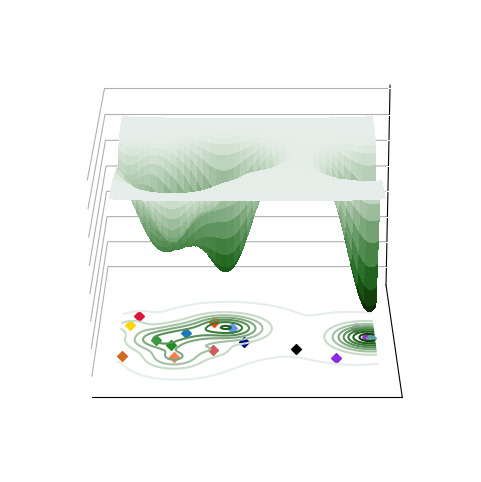

In [21]:
L = 10.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
fig = vi_potential(P.landscape_list[0], xx, yy, regime=40, color_scheme='order', scatter=True, elev=20, azim=-90)

In [20]:
color_s = (
    '#000000', # Black
    '#DC143C', # Crimson
    '#00008B', # Dark Blue
    '#228B22', # Forest Green
    'indianred',
    'tab:blue',
    'tab:green',
    'gold',
    'tab:purple',
    '#FF4500', # Orange Red
    '#8A2BE2', # Blue Violet
    '#5F9EA0', # Cadet Blue
    '#D2691E', # Chocolate
    '#FF7F50', # Coral
    '#6495ED', # Cornflower Blue
    '#9932CC', # Dark Orchid
    '#E9967A', # Dark Salmon
    '#8FBC8F', # Dark Sea Green
    '#483D8B', # Dark Slate Blue
)


def vi_potential(landscape, xx, yy, regime, color_scheme='fp_types', elev=None, azim=None, offset=2,
                        cmap_center=None, rot=False, scatter=False, zlim=None, tilt_par = None):
    curl = np.zeros((len(landscape.module_list)), dtype='bool')
    # circles = []
    fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(6, 6))
    ax.view_init(elev=elev, azim=azim)
    morphogen_times = landscape.morphogen_times
    landscape.morphogen_times = np.arange(landscape.n_regimes) + 0.5
    (dX, dY), potential, rot_potential = landscape(float(regime), (xx, yy), return_potentials=True)
    print(f'Tilt:{landscape.tilt_var} in t: {float(regime)}')
    if cmap_center is None:
        cmap_center = potential[0, 0]
    if rot:
        potential = rot_potential
        cmap = 'RdBu'
    else:
        cmap = scm.cork.reversed()

    if zlim is None:
        ax.set_zlim([np.min(potential) - offset, np.max(potential) + 2])
        zlow = np.min(potential) - offset
    else:
        ax.set_zlim(zlim)
        zlow = zlim[0]
    ax.contour(xx, yy, potential, zdir='z', offset=zlow, cmap=cmap, norm=CenteredNorm(cmap_center))
    ax.plot_surface(xx, yy, potential, cmap=cmap, linewidth=0, antialiased=False, norm=CenteredNorm(cmap_center))
    # if wind:
    #     right = rot_potential.copy()
    #     left = rot_potential.copy()
    #     right[rot_potential < 0] = 0
    #     left[rot_potential > 0] = 0
    #     ax.contour(xx, yy, right, zdir='z', offset=np.max(potential), cmap='RdBu', norm=CenteredNorm(0), zorder=10)
    #     ax.contour(xx, yy, np.abs(left), zdir='z', offset=np.max(potential), cmap='RdBu_r', norm=CenteredNorm(0),
    #                zorder=10)

    if scatter:
        for i, module in enumerate(landscape.module_list):
            if module.__class__.__name__ == 'Center' or module.__class__.__name__ == 'NegCenter':
                curl[i] = 1
            if color_scheme == 'fp_types':
                color = fp_type_colors[module.__class__.__name__]
            elif color_scheme == 'order':
                color = color_s[i]
            else:
                color = 'grey'
            ax.scatter(module.x, module.y, zlow, s=25, color=color, marker='D', zorder=20)

    landscape.morphogen_times = morphogen_times

    ax.set_xticks([])
    ax.set_yticks([])
    ax.zaxis.set_tick_params(color='white')
    ax.set_zticklabels([])
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # plt.tight_layout()
    # plt.show()
    return fig